<div style="text-align:center; margin: 10px 0;">
    <h2>✨ If you found this notebook insightful, please like! ✨</h2>
    <img src="https://img.icons8.com/emoji/48/000000/star-emoji.png" alt="Star Emoji" style="width:15px;"/>
    <img src="https://img.icons8.com/emoji/48/000000/star-emoji.png" alt="Star Emoji" style="width:15px;"/>
    <img src="https://img.icons8.com/emoji/48/000000/star-emoji.png" alt="Star Emoji" style="width:15px;"/>
</div>


## Imports

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

## EDA

In [42]:
train_adc_info = pd.read_csv('/kaggle/input/ariel-data-challenge-2024/train_adc_info.csv')
test_adc_info = pd.read_csv('/kaggle/input/ariel-data-challenge-2024/test_adc_info.csv')
train_labels = pd.read_csv('/kaggle/input/ariel-data-challenge-2024/train_labels.csv')
wavelengths = pd.read_csv('/kaggle/input/ariel-data-challenge-2024/wavelengths.csv')

train_adc_info.head()

,planet_id,FGS1_adc_offset,FGS1_adc_gain,AIRS-CH0_adc_offset,AIRS-CH0_adc_gain,star
0,785834,-343.335938,0.837244,-778.916533,0.924746,1
1,14485303,-366.381992,0.842983,-740.323212,0.931727,1
2,17002355,-386.107037,1.041701,-808.690659,1.513541,0
3,24135240,-339.737490,0.840239,-776.124167,0.931277,1
4,25070640,-355.660433,1.041280,-848.371494,1.503923,0


In [43]:
test_adc_info.head()

,planet_id,FGS1_adc_offset,FGS1_adc_gain,AIRS-CH0_adc_offset,AIRS-CH0_adc_gain,star
0,499191466,-331.033009,0.823442,-537.6921,0.937944,1


In [44]:
train_labels.head()

,planet_id,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,...,wl_274,wl_275,wl_276,wl_277,wl_278,wl_279,wl_280,wl_281,wl_282,wl_283
0,785834,0.001086,0.001137,0.001131,0.001124,0.001138,0.001131,0.001123,0.001127,0.001120,...,0.001075,0.001076,0.001076,0.001076,0.001074,0.001073,0.001072,0.001073,0.001073,0.001072
1,14485303,0.001835,0.001835,0.001834,0.001833,0.001833,0.001833,0.001833,0.001834,0.001834,...,0.001893,0.001892,0.001892,0.001891,0.001891,0.001891,0.001890,0.001890,0.001889,0.001888
2,17002355,0.002792,0.002814,0.002808,0.002804,0.002809,0.002805,0.002802,0.002805,0.002801,...,0.002784,0.002783,0.002783,0.002783,0.002783,0.002784,0.002784,0.002785,0.002785,0.002784
3,24135240,0.001294,0.001308,0.001308,0.001306,0.001306,0.001303,0.001306,0.001314,0.001314,...,0.001405,0.001404,0.001403,0.001402,0.001401,0.001400,0.001399,0.001397,0.001395,0.001393
4,25070640,0.001987,0.001987,0.001987,0.001987,0.001987,0.001987,0.001987,0.001987,0.001987,...,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988,0.001988


In [45]:
wavelengths.head()

,wl_1,wl_2,wl_3,wl_4,wl_5,wl_6,wl_7,wl_8,wl_9,wl_10,...,wl_274,wl_275,wl_276,wl_277,wl_278,wl_279,wl_280,wl_281,wl_282,wl_283
0,0.705,1.951761,1.960612,1.96945,1.978273,1.987083,1.995879,2.004661,2.01343,2.022184,...,3.84972,3.85481,3.859887,3.86495,3.869999,3.875034,3.880055,3.885063,3.890056,3.895036


In [46]:
axis_info = pd.read_parquet('/kaggle/input/ariel-data-challenge-2024/axis_info.parquet')
axis_info.head()

,AIRS-CH0-axis0-h,AIRS-CH0-axis2-um,AIRS-CH0-integration_time,FGS1-axis0-h
0,0.000028,4.078463,0.1,0.000028
1,0.000056,4.074023,4.5,0.000056
2,0.001361,4.069568,0.1,0.000139
3,0.001389,4.065100,4.5,0.000167
4,0.002694,4.060618,0.1,0.000250


In [47]:
train_adc_info.describe()

,planet_id,FGS1_adc_offset,FGS1_adc_gain,AIRS-CH0_adc_offset,AIRS-CH0_adc_gain,star
count,6.730000e+02,673.000000,673.000000,673.000000,673.000000,673.000000
mean,2.131767e+09,-357.398948,0.943041,-854.560443,1.229893,0.485884
std,1.200253e+09,22.420193,0.093620,72.363900,0.290949,0.500172
min,7.858340e+05,-492.503105,0.833336,-1173.513389,0.922824,0.000000
25%,1.121250e+09,-368.624356,0.847412,-893.584822,0.931239,0.000000
50%,2.042817e+09,-353.851553,1.018775,-847.357298,1.501496,0.000000
75%,3.101987e+09,-342.496345,1.034011,-802.459136,1.513060,1.000000
max,4.286134e+09,-313.264790,1.058764,-697.133862,1.525757,1.000000


In [48]:
train_adc_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   planet_id            673 non-null    int64  
 1   FGS1_adc_offset      673 non-null    float64
 2   FGS1_adc_gain        673 non-null    float64
 3   AIRS-CH0_adc_offset  673 non-null    float64
 4   AIRS-CH0_adc_gain    673 non-null    float64
 5   star                 673 non-null    int64  
dtypes: float64(4), int64(2)
memory usage: 31.7 KB


In [49]:
train_adc_info.isnull().sum()

planet_id              0
FGS1_adc_offset        0
FGS1_adc_gain          0
AIRS-CH0_adc_offset    0
AIRS-CH0_adc_gain      0
star                   0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


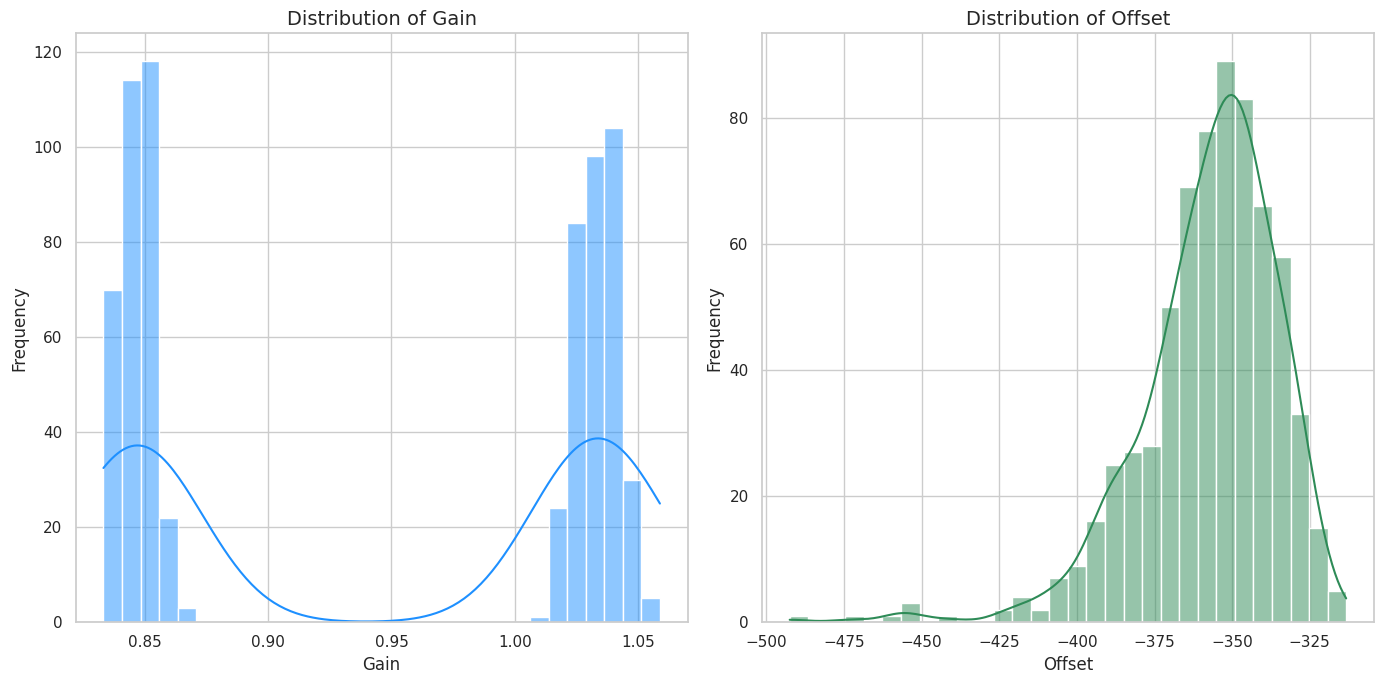

In [50]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.histplot(train_adc_info['FGS1_adc_gain'], bins=30, color='dodgerblue', kde=True, ax=ax[0])
ax[0].set_title('Distribution of Gain', fontsize=14)
ax[0].set_xlabel('Gain', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(train_adc_info['FGS1_adc_offset'], bins=30, color='seagreen', kde=True, ax=ax[1])
ax[1].set_title('Distribution of Offset', fontsize=14)
ax[1].set_xlabel('Offset', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()

In [51]:
def restore_dynamic_range(signal, gain, offset):
    return signal * gain + offset

In [52]:
signal_data = pd.read_parquet('/kaggle/input/ariel-data-challenge-2024/train/2633183716/AIRS-CH0_signal.parquet')
adc_info = train_adc_info[train_adc_info['planet_id'] == 2633183716]

In [53]:
restored_signal = restore_dynamic_range(signal_data, adc_info['FGS1_adc_gain'].values[0], adc_info['FGS1_adc_offset'].values[0])

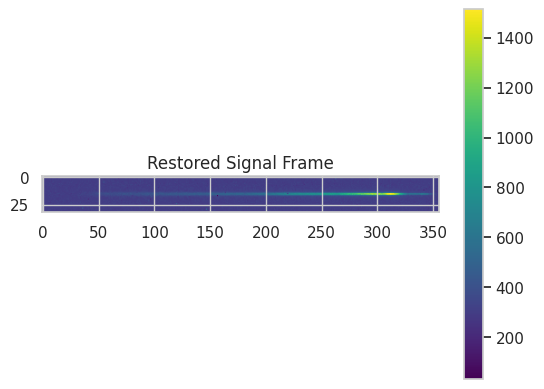

In [54]:
plt.imshow(restored_signal.iloc[0].values.reshape(32, 356), cmap='viridis')
plt.colorbar()
plt.title('Restored Signal Frame')
plt.show()

## Modelling

In [55]:
class ExoplanetDataset(Dataset):
    def __init__(self, signal_data, labels):
        self.signal_data = signal_data
        self.labels = labels

    def __len__(self):
        return len(self.signal_data)

    def __getitem__(self, idx):
        x = self.signal_data[idx]
        y = self.labels[idx]
        return x, y


In [56]:
def prepare_data(planet_id):
    signal_data = pd.read_parquet(f'/kaggle/input/ariel-data-challenge-2024/train/{planet_id}/AIRS-CH0_signal.parquet')
    adc_info = train_adc_info[train_adc_info['planet_id'] == planet_id]
    restored_signal = restore_dynamic_range(signal_data, adc_info['FGS1_adc_gain'].values[0], adc_info['FGS1_adc_offset'].values[0])
    return restored_signal


In [57]:
planet_id = 2633183716
restored_signal = prepare_data(planet_id)


In [58]:
print(f"Length of restored_signal: {len(restored_signal)}")
print(f"Length of train_labels: {len(train_labels)}")

Length of restored_signal: 11250
Length of train_labels: 673


In [59]:
signal_length = len(restored_signal)
label_length = train_labels.shape[0]


In [60]:
if signal_length > label_length:
    restored_signal = restored_signal[:label_length]
elif label_length > signal_length:
    train_labels = train_labels.iloc[:signal_length]

print(f"Adjusted length of restored_signal: {len(restored_signal)}")
print(f"Adjusted length of train_labels: {len(train_labels)}")


Adjusted length of restored_signal: 673
Adjusted length of train_labels: 673


In [61]:
train_dataset = ExoplanetDataset(restored_signal.values.reshape(-1, 1, 32, 356), train_labels.iloc[:, 1:].values)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


#### I will build more complex model in future updates

In [62]:
class ExoplanetModel(nn.Module):
    def __init__(self):
        super(ExoplanetModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        
        # Calculate the size after convolutions
        self.conv_output_size = 64 * 32 * 356
        
        self.fc1 = nn.Linear(self.conv_output_size, 128)
        self.fc2 = nn.Linear(128, 283)  # 283 wavelengths

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [63]:
model = ExoplanetModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [64]:
# num_epochs = 20
# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0
#     for x, y in train_loader:
#         x, y = x.float(), y.float()
#         optimizer.zero_grad()
#         outputs = model(x)
#         loss = criterion(outputs, y)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     print(f'Epoch {epoch+1}/{num_epochs}, Loss: {total_loss/len(train_loader)}')

# torch.save(model.state_dict(), 'exoplanet_model.pth')

In [65]:
model = ExoplanetModel()
model_path = '/kaggle/input/exoplanet-model/pytorch/default/1/exoplanet_model.pth'
model.load_state_dict(torch.load(model_path))
model.eval()

ExoplanetModel(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=729088, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=283, bias=True)
)

In [66]:
def prepare_test_data(planet_id):
    signal_data = pd.read_parquet(f'/kaggle/input/ariel-data-challenge-2024/test/{planet_id}/AIRS-CH0_signal.parquet')
    adc_info = test_adc_info[test_adc_info['planet_id'] == planet_id]  # Assuming test_adc_info is available
    restored_signal = restore_dynamic_range(signal_data, adc_info['FGS1_adc_gain'].values[0], adc_info['FGS1_adc_offset'].values[0])
    return restored_signal

planet_id_test = 499191466 
restored_signal_test = prepare_test_data(planet_id_test)
restored_signal_test

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_11382,column_11383,column_11384,column_11385,column_11386,column_11387,column_11388,column_11389,column_11390,column_11391
0,77.394213,96.333379,67.512910,75.747329,78.217655,111.155334,88.922401,77.394213,102.097473,72.453561,...,66.689468,83.981749,83.981749,79.864539,72.453561,90.569285,96.333379,86.452075,79.041097,66.689468
1,89.745843,90.569285,73.277003,86.452075,102.097473,98.803705,78.217655,83.981749,81.511423,83.158307,...,78.217655,79.041097,89.745843,74.100445,82.334865,71.630119,88.922401,86.452075,97.980263,83.158307
2,74.923887,74.100445,100.450589,55.984722,116.919428,80.687981,77.394213,82.334865,79.041097,81.511423,...,77.394213,71.630119,83.158307,74.923887,74.923887,82.334865,73.277003,93.863053,85.628633,85.628633
3,97.980263,63.395700,80.687981,84.805191,98.803705,66.689468,71.630119,75.747329,93.863053,89.745843,...,84.805191,105.391241,93.039611,81.511423,95.509937,76.570771,83.981749,96.333379,95.509937,84.805191
4,79.864539,84.805191,83.158307,67.512910,93.863053,84.805191,74.100445,93.863053,102.097473,90.569285,...,93.863053,97.156821,83.981749,90.569285,90.569285,87.275517,95.509937,74.923887,71.630119,79.864539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,89.745843,96.333379,94.686495,71.630119,78.217655,85.628633,81.511423,91.392727,88.098959,74.923887,...,80.687981,88.098959,100.450589,89.745843,96.333379,91.392727,103.744357,97.156821,69.983235,86.452075
11246,77.394213,73.277003,94.686495,83.981749,81.511423,76.570771,83.981749,72.453561,59.278490,87.275517,...,85.628633,83.981749,92.216169,81.511423,83.158307,77.394213,81.511423,79.864539,88.098959,96.333379
11247,88.922401,61.748816,95.509937,92.216169,92.216169,79.041097,70.806677,87.275517,98.803705,84.805191,...,107.861567,68.336351,93.039611,67.512910,93.863053,85.628633,88.098959,93.039611,85.628633,85.628633
11248,83.158307,80.687981,88.098959,84.805191,88.098959,93.039611,96.333379,79.041097,69.159793,85.628633,...,105.391241,60.925374,68.336351,73.277003,67.512910,81.511423,83.981749,68.336351,90.569285,107.038125


In [67]:
planet_id_test = 499191466  
restored_signal_test = prepare_test_data(planet_id_test)

restored_signal_test = restored_signal_test.values.reshape(-1, 1, 32, 356)

test_dataset = ExoplanetDataset(restored_signal_test, np.zeros((restored_signal_test.shape[0], 283)))  # Dummy labels
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [68]:
def evaluate_model(model, data_loader):
    model.eval()
    total_gll = 0
    with torch.no_grad():
        for x, _ in data_loader: 
            x = x.float()
            outputs = model(x).numpy()
            y_true = np.zeros_like(outputs)  
            sigma_user = np.ones_like(outputs) * 1e-5 
            gll = -0.5 * (np.log(2 * np.pi) + np.log(sigma_user**2) + ((y_true - outputs)**2 / sigma_user**2))
            total_gll += gll.sum()
    return total_gll

In [69]:
gll_value = evaluate_model(model, test_loader)
print(f'Gaussian Log-Likelihood: {gll_value}')

Gaussian Log-Likelihood: -44527981576192.0


In [70]:
def plot_spectra(y_true, y_pred, wavelengths):
    plt.figure(figsize=(10, 6))
    if y_true is not None:
        plt.plot(wavelengths, y_true, label='True Spectrum', linestyle='--', color='blue')
    plt.plot(wavelengths, y_pred, label='Predicted Spectrum', linestyle='-', color='red')
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity')
    plt.title('Exoplanet Atmospheric Spectrum')
    plt.legend()
    plt.show()

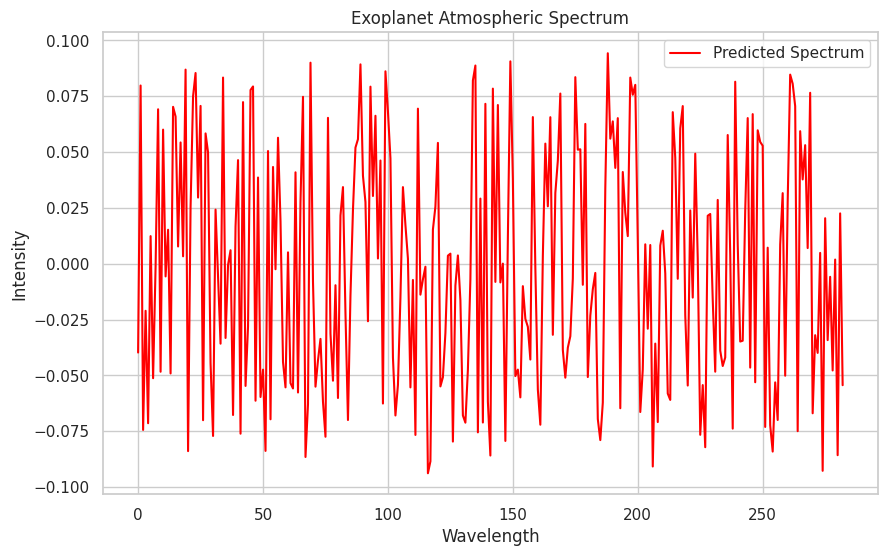

In [71]:
for x, _ in test_loader:
    x = x.float()
    outputs = model(x)
    y_pred = outputs.detach().numpy()
    wavelengths = np.arange(283)
    plot_spectra(None, y_pred[0], wavelengths)
    break

In [72]:
sample_sub = pd.read_csv('/kaggle/input/ariel-data-challenge-2024/sample_submission.csv')

In [73]:
LABELS = list(sample_sub.columns[1:])

In [77]:
y_preds = []
sigmas = []
for x, _ in test_loader:
    x = x.float()
    outputs = model(x)
    y_pred = outputs.detach().numpy()
    sigma_user = np.ones_like(y_pred) * 1e-5
    y_preds.append(y_pred)
    sigmas.append(sigma_user)

In [79]:
tsub = [] 
tsub.append(y_preds)
tsub.append(sigmas)

In [81]:
print(tsub)

[[array([[-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746],
       [-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746],
       [-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746],
       ...,
       [-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746],
       [-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746],
       [-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746]], dtype=float32), array([[-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746],
       [-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746],
       [-0.03974178,  0.07980832, -0.07439195, ..., -0.08570345,
         0.02255488, -0.05436746],
       ...,
       [-0.03974178,  0.07980832, -0.07439195, ..., -0.08

In [80]:
sub = pd.DataFrame()
sub['planet_id'] = planet_id_test
sub[LABELS] = tsub
sub.head(25)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (2, 352) + inhomogeneous part.